In [137]:
import numpy as np
import time
import pandas as pd

np.random.seed(seed=42)

In [138]:
def binary_search(list, item):
    low = 0
    high = len (list)-1
    while low <= high:
        mid = (low + high) // 2
        guess = list[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
    return None

def linear_search(list, item):
    i = 0
    high = len(list)-1
    while i <= high:
        if i == item:
            return i
        else:
            i +=1
    return None

In [139]:

timer = pd.DataFrame(columns=['len','sort', 'lin', 'bin', 'sort+lin', 'sort+bin'])
for i in [512, 1024, 2048, 4096, 8192]:
    
    timer_list=[]
    
    timer_list.append(i)
    a = np.random.randint(10000, size=(1, i))
    
    sort_start = time.time()
    a = np.sort(a)
    sort_end = time.time()
    sort_time = sort_end-sort_start
    timer_list.append(sort_time)
    
    a = a.tolist()[0]
    search_a = max(a)
    
    linear_start = time.time()
    linear_search(a, search_a)
    linear_end = time.time()
    linear_time = linear_end-linear_start
    timer_list.append(linear_time)
    
    binary_start = time.time()
    binary_search(a, search_a)
    binary_end = time.time()
    binary_time = binary_end-binary_start
    timer_list.append(binary_time)
    
    timer_list.append(sort_time+linear_time)
    timer_list.append(sort_time+binary_time)
    
    r = pd.Series(timer_list, index=timer.columns)
    timer = timer.append(r, ignore_index=True)

,sort,lin,bin,sort+lin,sort+bin
len,,,,,
512.0,0.000041,0.000042,0.000004,0.000083,0.000045
1024.0,0.000272,0.000085,0.000004,0.000357,0.000276
2048.0,0.000111,0.000180,0.000007,0.000291,0.000118
4096.0,0.000202,0.000334,0.000006,0.000536,0.000208
8192.0,0.000427,0.000676,0.000007,0.001103,0.000434


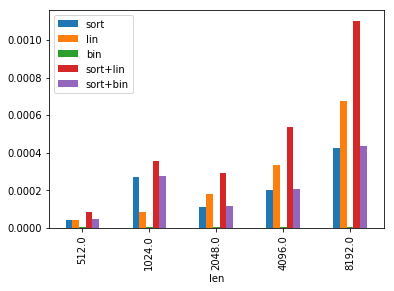

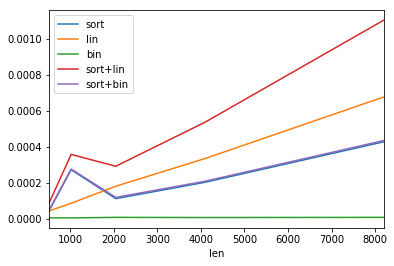

In [140]:
timer.set_index('len').plot.bar()
timer.set_index('len').plot.line()
timer.set_index('len')